In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
#Reading csv file
df = pd.read_csv('C:/Users/DIMO/Desktop/WORK SPACE/Churn_Train.csv')

In [3]:
df.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,NV,125.0,area_code_510,no,no,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,no
1,HI,108.0,area_code_415,no,no,0.0,291.6,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,yes
2,DC,82.0,area_code_415,no,no,0.0,300.3,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,yes
3,HI,NaN,area_code_408,no,yes,30.0,110.3,71.0,18.75,182.4,108.0,15.50,183.8,88,8.27,11.0,8.0,2.97,2.0,no
4,OH,83.0,area_code_415,no,no,0.0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,yes


In [4]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [5]:
#Converting categorical variables to numeric variables
cart = df[['state','area_code','international_plan','voice_mail_plan', 'churn']]

In [6]:
labelencoder = LabelEncoder()
encodedf = pd.DataFrame(columns = cart.columns)
for col in cart.columns:
    encodedf[col] = labelencoder.fit_transform(cart[col])
encodedf    

,state,area_code,international_plan,voice_mail_plan,churn
0,33,2,0,0,0
1,11,1,0,0,1
2,7,1,0,0,1
3,11,0,0,1,0
4,35,1,0,0,1
...,...,...,...,...,...
3328,35,1,0,1,0
3329,18,1,0,1,0
3330,41,1,0,0,0
3331,34,0,0,0,0


In [7]:
#Droping previous categorical columns and joining encoded columns
df = df.drop(columns = ['state','area_code','international_plan','voice_mail_plan','churn'])

In [8]:
ndf = encodedf.join(df, how= 'left')
ndf.head()

,state,area_code,international_plan,voice_mail_plan,churn,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,33,2,0,0,0,125.0,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0
1,11,1,0,0,1,108.0,0.0,291.6,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0
2,7,1,0,0,1,82.0,0.0,300.3,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0
3,11,0,0,1,0,NaN,30.0,110.3,71.0,18.75,182.4,108.0,15.50,183.8,88,8.27,11.0,8.0,2.97,2.0
4,35,1,0,0,1,83.0,0.0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0


In [9]:
ndf = ndf[['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn']]
ndf.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,33,125.0,2,0,0,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,0
1,11,108.0,1,0,0,0.0,291.6,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,1
2,7,82.0,1,0,0,0.0,300.3,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,1
3,11,NaN,0,0,1,30.0,110.3,71.0,18.75,182.4,108.0,15.50,183.8,88,8.27,11.0,8.0,2.97,2.0,0
4,35,83.0,1,0,0,0.0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,1


In [10]:
ndf['international_plan'].value_counts()

0    3010
1     323
Name: international_plan, dtype: int64

In [11]:
#Getting an overview of the data
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   int32  
 1   account_length                 2832 non-null   float64
 2   area_code                      3333 non-null   int32  
 3   international_plan             3333 non-null   int32  
 4   voice_mail_plan                3333 non-null   int32  
 5   number_vmail_messages          3133 non-null   float64
 6   total_day_minutes              3133 non-null   float64
 7   total_day_calls                3133 non-null   float64
 8   total_day_charge               3133 non-null   float64
 9   total_eve_minutes              3032 non-null   float64
 10  total_eve_calls                3133 non-null   float64
 11  total_eve_charge               3133 non-null   float64
 12  total_night_minutes            3133 non-null   f

In [12]:
#Checking for duplicate samples
ndf.duplicated().sum()

0

In [13]:
ndf[ndf.duplicated()]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [14]:
#DEALING WITH MISSING VALUES
#Checking if data contain missing values
ndf.isna().sum()

state                              0
account_length                   501
area_code                          0
international_plan                 0
voice_mail_plan                    0
number_vmail_messages            200
total_day_minutes                200
total_day_calls                  200
total_day_charge                 200
total_eve_minutes                301
total_eve_calls                  200
total_eve_charge                 200
total_night_minutes              200
total_night_calls                  0
total_night_charge               200
total_intl_minutes               200
total_intl_calls                 301
total_intl_charge                200
number_customer_service_calls    200
churn                              0
dtype: int64

In [15]:
#Getting the % of missing values
def percent_missing(ndf):
    missing = 100 * ndf.isna().sum() /len(ndf)
    missing = missing[missing > 0].sort_values()
    return missing

In [16]:
percent = percent_missing(ndf)
percent

number_vmail_messages             6.000600
total_day_minutes                 6.000600
total_day_calls                   6.000600
total_day_charge                  6.000600
total_eve_calls                   6.000600
total_eve_charge                  6.000600
total_night_minutes               6.000600
total_night_charge                6.000600
total_intl_minutes                6.000600
total_intl_charge                 6.000600
number_customer_service_calls     6.000600
total_eve_minutes                 9.030903
total_intl_calls                  9.030903
account_length                   15.031503
dtype: float64

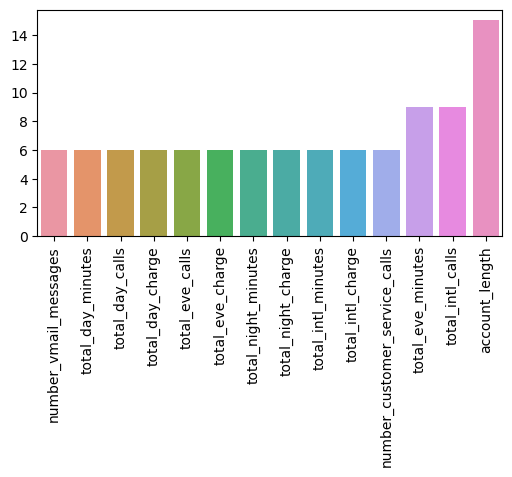

In [17]:
#Visualizing missing values %
plt.figure(figsize=(6,3),dpi=100)
sns.barplot(x=percent.index, y=percent)
plt.xticks(rotation=90);

In [18]:
#Checking the samples that are NA in this column
ndf[ndf['total_day_calls'].isna()]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
11,22,NaN,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110,NaN,NaN,NaN,NaN,NaN,1
31,19,NaN,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126,NaN,NaN,NaN,NaN,NaN,1
32,34,NaN,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,0
41,0,NaN,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,NaN,NaN,0
74,33,NaN,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,39,NaN,2,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,1
3234,4,NaN,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109,NaN,NaN,NaN,NaN,NaN,0
3267,16,NaN,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN,NaN,NaN,NaN,0
3275,17,NaN,2,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143,NaN,NaN,NaN,NaN,NaN,1


In [44]:
ndf['account_length'].isna().sum()

501

In [24]:
#Checking if its the same samples that are missing in other columns
ndf[ndf['total_day_calls'].isna()][['total_eve_calls','total_night_charge','total_intl_charge']]

,total_eve_calls,total_night_charge,total_intl_charge
11,NaN,NaN,NaN
31,NaN,NaN,NaN
32,NaN,NaN,NaN
41,NaN,NaN,NaN
74,NaN,NaN,NaN
...,...,...,...
3223,NaN,NaN,NaN
3234,NaN,NaN,NaN
3267,NaN,NaN,NaN
3275,NaN,NaN,NaN


In [25]:
#Droping the sanmples that are missing in the columns below
ndf = ndf.dropna(axis = 0, subset =['total_day_calls','total_intl_charge'])

In [26]:
percent_missing(ndf)

total_eve_minutes    3.223747
total_intl_calls     3.223747
account_length       9.607405
dtype: float64

In [27]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3133 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3133 non-null   int32  
 1   account_length                 2832 non-null   float64
 2   area_code                      3133 non-null   int32  
 3   international_plan             3133 non-null   int32  
 4   voice_mail_plan                3133 non-null   int32  
 5   number_vmail_messages          3133 non-null   float64
 6   total_day_minutes              3133 non-null   float64
 7   total_day_calls                3133 non-null   float64
 8   total_day_charge               3133 non-null   float64
 9   total_eve_minutes              3032 non-null   float64
 10  total_eve_calls                3133 non-null   float64
 11  total_eve_charge               3133 non-null   float64
 12  total_night_minutes            3133 non-null   f

In [28]:
ndf['total_eve_calls'].value_counts()

94.0     72
105.0    72
88.0     67
97.0     67
108.0    67
         ..
42.0      1
45.0      1
156.0     1
157.0     1
0.0       1
Name: total_eve_calls, Length: 120, dtype: int64

In [29]:
ndf['total_eve_minutes']= ndf.groupby('total_eve_calls')['total_eve_minutes'].transform(lambda value: value.fillna(value.mean()))
ndf['total_intl_calls']= ndf.groupby('total_intl_minutes')['total_intl_calls'].transform(lambda value: value.fillna(value.mean()))

In [30]:
ndf[['total_eve_minutes','total_intl_calls']]

,total_eve_minutes,total_intl_calls
0,1107.600000,7.0
1,221.100000,9.0
2,181.000000,4.0
3,182.400000,8.0
4,227.400000,7.0
...,...,...
3328,108.100000,5.0
3329,343.498507,4.0
3330,180.200000,2.0
3331,1034.600000,5.0


In [31]:
percent_missing(ndf)

total_eve_minutes    0.031918
account_length       9.607405
dtype: float64

In [32]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3133 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3133 non-null   int32  
 1   account_length                 2832 non-null   float64
 2   area_code                      3133 non-null   int32  
 3   international_plan             3133 non-null   int32  
 4   voice_mail_plan                3133 non-null   int32  
 5   number_vmail_messages          3133 non-null   float64
 6   total_day_minutes              3133 non-null   float64
 7   total_day_calls                3133 non-null   float64
 8   total_day_charge               3133 non-null   float64
 9   total_eve_minutes              3132 non-null   float64
 10  total_eve_calls                3133 non-null   float64
 11  total_eve_charge               3133 non-null   float64
 12  total_night_minutes            3133 non-null   f

In [33]:
ndf = ndf[ndf['total_eve_minutes'].notna()]

In [34]:
percent_missing(ndf)

account_length    9.610473
dtype: float64

In [35]:
ndf = ndf.fillna(0)

In [36]:
ndf.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [37]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3132 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3132 non-null   int32  
 1   account_length                 3132 non-null   float64
 2   area_code                      3132 non-null   int32  
 3   international_plan             3132 non-null   int32  
 4   voice_mail_plan                3132 non-null   int32  
 5   number_vmail_messages          3132 non-null   float64
 6   total_day_minutes              3132 non-null   float64
 7   total_day_calls                3132 non-null   float64
 8   total_day_charge               3132 non-null   float64
 9   total_eve_minutes              3132 non-null   float64
 10  total_eve_calls                3132 non-null   float64
 11  total_eve_charge               3132 non-null   float64
 12  total_night_minutes            3132 non-null   f

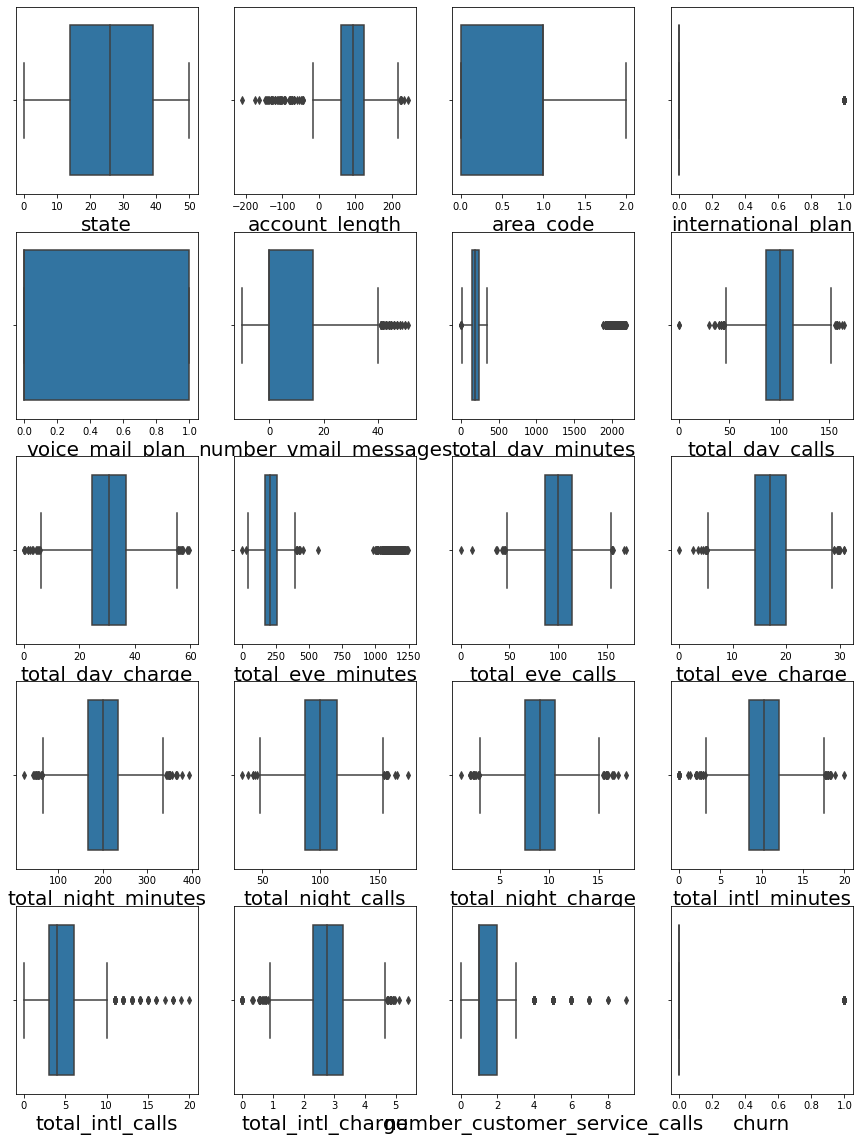

In [38]:
# Checking for outliers
plt.figure(figsize = (15, 20))
for i in range (len(ndf.columns)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x = ndf.iloc[:, i])
    plt.xlabel(ndf.columns[i], size = 20)

In [39]:
# Removing Outliers
def outliers(ndf, feature):
    IQ1 = ndf[feature].quantile(0.25)
    IQ3 = ndf[feature].quantile(0.75)
    IQR = IQ3 - IQ1
    
    lowerBound = IQ1 - 1.7 * IQR
    upperBound = IQ3 + 1.7 * IQR

#Getting index positions of all outliers
    index = ndf.index[(ndf[feature] < lowerBound) | (ndf[feature] > upperBound)]
    return index

# Getting index of all outliers
index = []
for i in ndf.columns:
    index.extend(outliers(ndf, i))
index = set(index)
print("Total number of outliers are {}".format(len(index)))

# Drop all outliers
ndf.drop(index, inplace = True, axis = 0)
ndf.shape

Total number of outliers are 1181


(1951, 20)

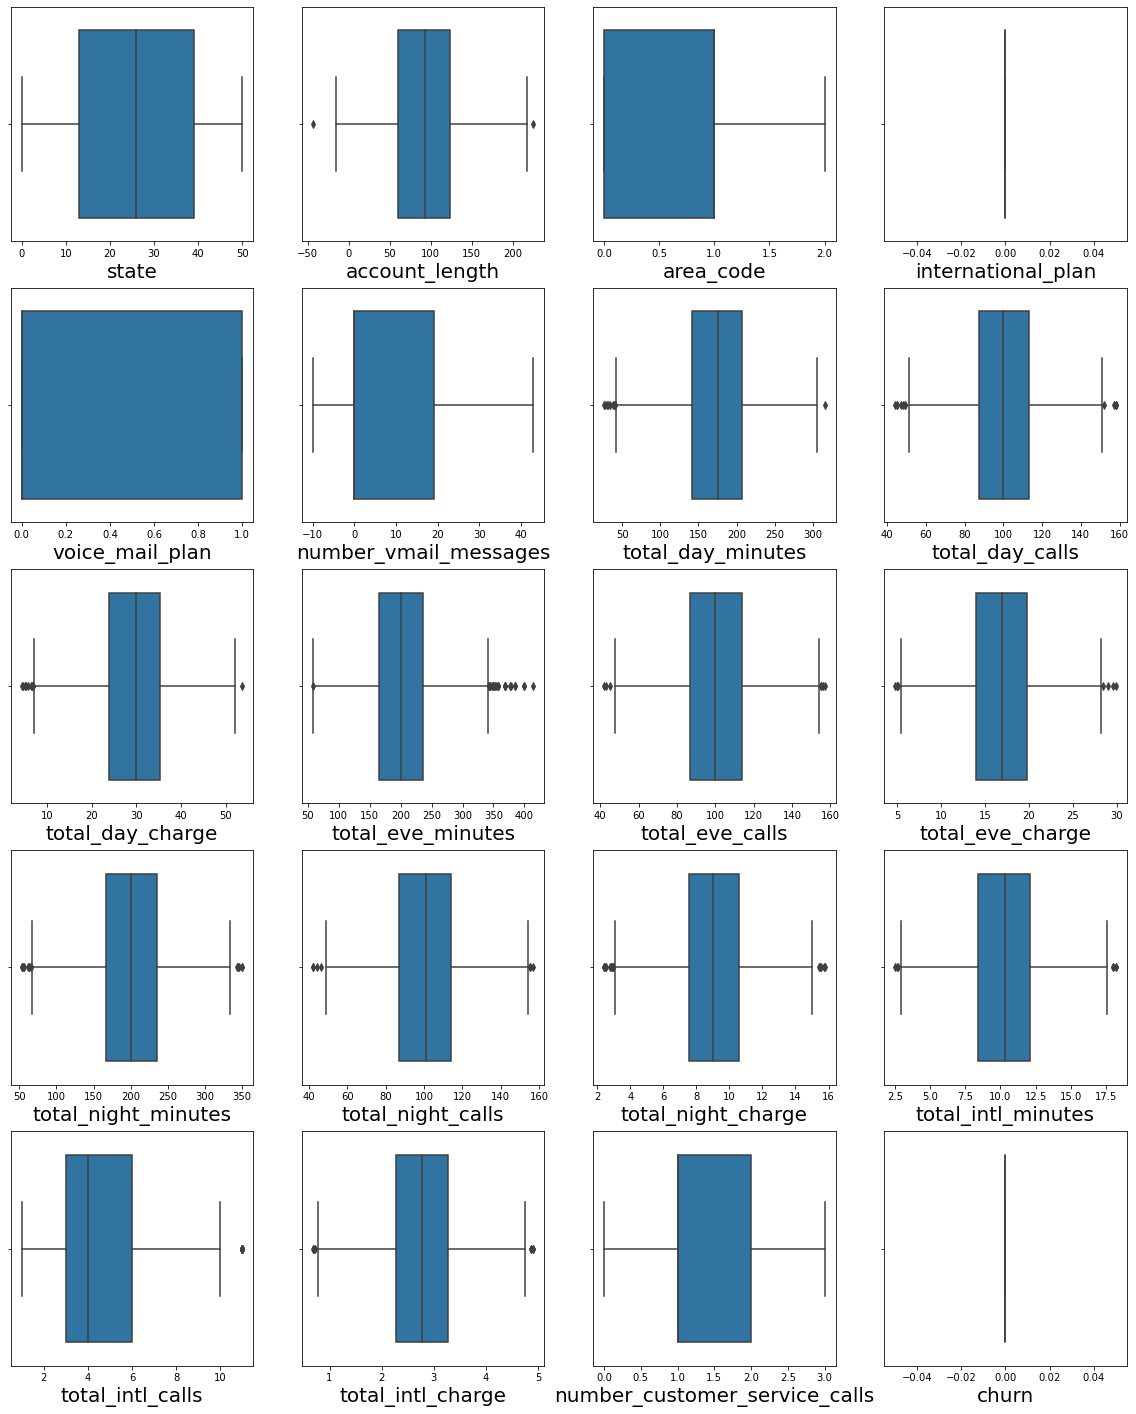

In [40]:
# Checking for outliers
plt.figure(figsize = (20, 25))
for i in range (len(ndf.columns)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x = ndf.iloc[:, i])
    plt.xlabel(ndf.columns[i], size = 20)

<AxesSubplot:ylabel='Density'>

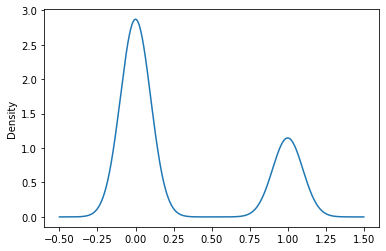

In [41]:
ndf['voice_mail_plan'].plot(kind = 'density')

In [42]:
ndf['voice_mail_plan'].value_counts()

0    1394
1     557
Name: voice_mail_plan, dtype: int64

In [43]:
ndf.describe().T

,count,mean,std,min,25%,50%,75%,max
state,1951.0,25.806253,14.994576,0.00,13.000,26.00,39.000,50.000000
account_length,1951.0,89.321374,48.722150,-44.00,60.000,93.00,123.000,225.000000
area_code,1951.0,0.982060,0.704699,0.00,0.000,1.00,1.000,2.000000
international_plan,1951.0,0.000000,0.000000,0.00,0.000,0.00,0.000,0.000000
voice_mail_plan,1951.0,0.285495,0.451765,0.00,0.000,0.00,1.000,1.000000
number_vmail_messages,1951.0,7.362378,13.724819,-10.00,0.000,0.00,19.000,43.000000
total_day_minutes,1951.0,173.526140,49.234012,25.90,141.100,176.00,207.300,315.600000
total_day_calls,1951.0,100.183496,19.265251,44.00,87.500,100.00,113.000,158.000000
total_day_charge,1951.0,29.500000,8.369670,4.40,23.990,29.92,35.240,53.650000
total_eve_minutes,1951.0,202.563648,53.976269,58.60,165.100,200.50,236.050,414.386364
